# Intelligent Systems for Pattern Recognition (unipi)
## Assigment 1 - 3rd choice

>Perform image segmentation on one of the eight image thematic subsets. Note that each file has a name starting with a number from 1 to 8, which indicates the thematic subset, followed by the rest of the file name. I suggest to use image subsets “1_*” or “2_*”.  Use the normalized cut algorithm to perform image segmentation. You are welcome to confront the result with kmeans segmentation algorithm if you wish.

[Used dataset](http://download.microsoft.com/download/A/1/1/A116CD80-5B79-407E-B5CE-3D5C6ED8B0D5/msrc_objcategimagedatabase_v1.zip) (from microsoft)

---
## Load dataset

In [18]:
import os
import cv2 # use OpenCV for dealing with images
from sklearn.cluster import KMeans
import numpy as np

In [19]:
dataset_dir = 'MSRC_ObjCategImageDatabase_v1'
image_subset_prefix = "1_"
images = {}
#import image subset by listing all images in dataset directory
for filename in os.listdir(dataset_dir):
    if filename.startswith(image_subset_prefix):
        images[filename] = cv2.imread(dataset_dir+os.sep+filename, cv2.IMREAD_COLOR)
        
# obtain dict filename-image matrix
print([v.shape for k, v in images.items() ])

[(213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3)]


___
## K-MEANS approach
### Let's first try the easiest approach to image segmentation by applying k-means clustering algorithm to pixel colors

In [20]:
# let's organize data in a matrix containing (#pixel - RGB value)
imageRGB_matrix = {}
for k, v in images.items():
#     npixels = v.shape[0] * v.shape[1]
#     matrix = np.transpose(v)
#     matrix = matrix.reshape(npixels, 3)
    imageRGB_matrix[k] = v.reshape(-1, 3)
print(imageRGB_matrix['1_11_s.bmp'].shape)

(68160, 3)


`Choose best k by looking at sum of squared distances`

In [37]:
images_kmeans = []
# apply kmeans to every image
for k, image in imageRGB_matrix.items():
    bestk = KMeans(n_clusters=2, n_init=10, verbose=0, n_jobs=-1).fit(image)
    for k in range(3, 10):
        kmeans = KMeans(n_clusters=k, n_init=10, n_jobs=-1).fit(image)
        # only keep best K-means result
        if kmeans.inertia_ < bestk.inertia_:
            bestk = kmeans
    images_kmeans.append(bestk)

/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971

/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971

/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971

/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971

/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971

/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971

## Draw images using their cluster centers 

In [39]:
images_to_print = []
for bestk in images_kmeans:
    image_to_print = bestk.cluster_centers_[bestk.labels_[0]]
    for i, l in enumerate(bestk.labels_):
        if i > 0:
            image_to_print = np.vstack((image_to_print, bestk.cluster_centers_[l]))       
    # convert image back to 3d tensor
    image_to_print = image_to_print.reshape(213, 320, 3).astype(np.int32)
    images_to_print.append(image_to_print)

In [23]:
bestk.labels_.shape

(68160,)

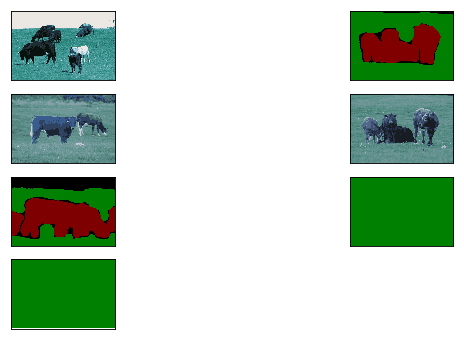

In [43]:
bestk.labels_.shape
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
import random 

# draw some random segmented images along with their original form
keys = list(images.keys())
for i in range(6):
    # choose random image to display
    r = random.randint(0, len(keys))
    plt.subplot(6, 2, i+1)
    plt.imshow(images_to_print[r+i])
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.subplot(6, 2, i+2)
    plt.imshow(images[keys[r+i]])
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


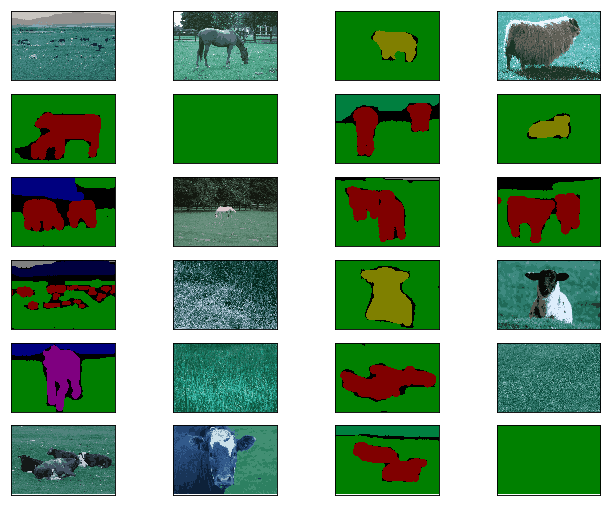

In [45]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
import random 

for i in range(24):
    plt.subplot(6, 4, i+1)
    plt.imshow(images_to_print[i])
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
